# FTSE 100 stocks data collection and Exploratory Data Analysis

## 1. Introduction

Historical stock market data from Yahoo! Finance will be collected, analysed, transformed and visualised to gain insights into the stock returns for a selection of FTSE 100 companies from 2010-2019, as well as looking at the FTSE 100 Index itself.

## 2. Install/import libraries

In [ ]:
!pip install yfinance as yfinance
!pip install mplfinance

In [ ]:
import yfinance as yf

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.patches as mpatches
from matplotlib.dates import date2num, DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
from mplfinance.original_flavor import candlestick_ohlc
import seaborn as sns

import datetime
from datetime import date, timedelta

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

## 3. Data collection

Download FTSE 100 stock data from Yahoo! Finance using yfinance library and store in a pandas dataframe. The stocks chosen are ULVR.L (Unilever), RSDB.L (Royal Dutch Shell), GSK.L (GlaxoSmithKline), AZN.L (AstraZeneca), HSBA.L (HSBC) and BP.L (BP) representing a selection of different industries - pharmaceuticals, oil and finance.

In [ ]:
ftse100_stocks = yf.download("AZN.L GSK.L ULVR.L BP.L RDSB.L HSBA.L", start=datetime.datetime(2010, 1, 1), 
                                     end=datetime.datetime(2019, 12, 31), group_by='tickers')
ftse100_stocks.head(10)

[*********************100%***********************]  6 of 6 completed


ULVR.L                  ...        BP.L                      
              Open    High     Low  ...       Close   Adj Close    Volume
Date                                ...                                  
2010-01-04  1987.0  2006.0  1981.0  ...  613.599976  323.723907  17956918
2010-01-05  1990.0  1997.0  1942.0  ...  620.099976  327.153046  28352666
2010-01-06  1943.0  1955.0  1935.0  ...  619.400024  326.783966  22054752
2010-01-07  1948.0  1961.0  1926.0  ...  623.299988  328.841431  30630196
2010-01-08  1941.0  1948.0  1917.0  ...  621.700012  327.997284  22458240
2010-01-11  1948.0  1954.0  1928.0  ...  635.500000  335.277985  30868820
2010-01-12  1933.0  1938.0  1912.0  ...  633.799988  334.381042  36551528
2010-01-13  1915.0  1943.0  1912.0  ...  626.599976  330.582458  41391183
2010-01-14  1944.0  1955.0  1931.0  ...  628.400024  331.532104  28992984
2010-01-15  1932.0  1940.0  1925.0  ...  629.000000  331.848663  69339704

[10 rows x 36 columns]

## 4. Exploratory Data Analysis

In [ ]:
# Descriptive statistics showing distribution of the data

ftse100_stocks.describe()

ULVR.L               ...         BP.L              
              Open         High  ...    Adj Close        Volume
count  2518.000000  2518.000000  ...  2518.000000  2.518000e+03
mean   3009.072589  3032.981653  ...   314.465199  3.431789e+07
std     942.883609   949.617451  ...    77.295875  1.926278e+07
min    1688.000000  1694.000000  ...   162.197952  0.000000e+00
25%    2156.500000  2173.000000  ...   255.162006  2.338165e+07
50%    2753.500000  2778.000000  ...   291.255646  3.025268e+07
75%    3992.875000  4020.750000  ...   357.829140  3.961792e+07
max    5333.000000  5333.000000  ...   494.692047  3.183580e+08

[8 rows x 36 columns]

In [ ]:
# Concise summary of the dataframe to check for missing values and data types

ftse100_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2010-01-04 to 2019-12-30
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   (ULVR.L, Open)       2518 non-null   float64
 1   (ULVR.L, High)       2518 non-null   float64
 2   (ULVR.L, Low)        2518 non-null   float64
 3   (ULVR.L, Close)      2518 non-null   float64
 4   (ULVR.L, Adj Close)  2518 non-null   float64
 5   (ULVR.L, Volume)     2518 non-null   int64  
 6   (RDSB.L, Open)       2518 non-null   float64
 7   (RDSB.L, High)       2518 non-null   float64
 8   (RDSB.L, Low)        2518 non-null   float64
 9   (RDSB.L, Close)      2518 non-null   float64
 10  (RDSB.L, Adj Close)  2518 non-null   float64
 11  (RDSB.L, Volume)     2518 non-null   int64  
 12  (GSK.L, Open)        2518 non-null   float64
 13  (GSK.L, High)        2518 non-null   float64
 14  (GSK.L, Low)         2518 non-null   float64
 15  (GSK.L, Close)      

In [ ]:
# Number of rows indicates number of trading days

ftse100_stocks.shape

(2518, 36)

We will use the Adjusted Close price to take into account all corporate actions, such as stock splits and dividends, to give a more accurate reflection of the true value of the stock and present a coherent picture of returns.

In [ ]:
# Dataframe to contain Adjusted Close price for each company's stock

adj_close = pd.DataFrame()

In [ ]:
tickers = ['AZN.L', 'GSK.L', 'ULVR.L', 'BP.L', 'RDSB.L', 'HSBA.L']
for ticker in tickers:
    adj_close[ticker] = ftse100_stocks[ticker]['Adj Close']

adj_close

,AZN.L,GSK.L,ULVR.L,BP.L,RDSB.L,HSBA.L
Date,,,,,,
2010-01-04,1775.206909,756.376343,1376.149414,323.723907,994.839417,416.241150
2010-01-05,1754.986084,738.024170,1346.502808,327.153046,1006.056519,422.256897
2010-01-06,1735.368652,731.530701,1347.882080,326.783966,992.970276,424.205078
2010-01-07,1756.796875,730.401428,1331.334717,328.841431,990.833374,421.970551
2010-01-08,1755.589600,723.343201,1334.781982,327.997284,980.150513,423.975769
...,...,...,...,...,...,...
2019-12-20,7592.499512,1725.294800,4227.802246,431.790558,2117.319580,577.489746
2019-12-23,7532.210938,1727.007568,4287.825195,435.351318,2141.492920,576.335144
2019-12-24,7501.093750,1729.481567,4249.584473,434.149597,2157.134521,576.720032


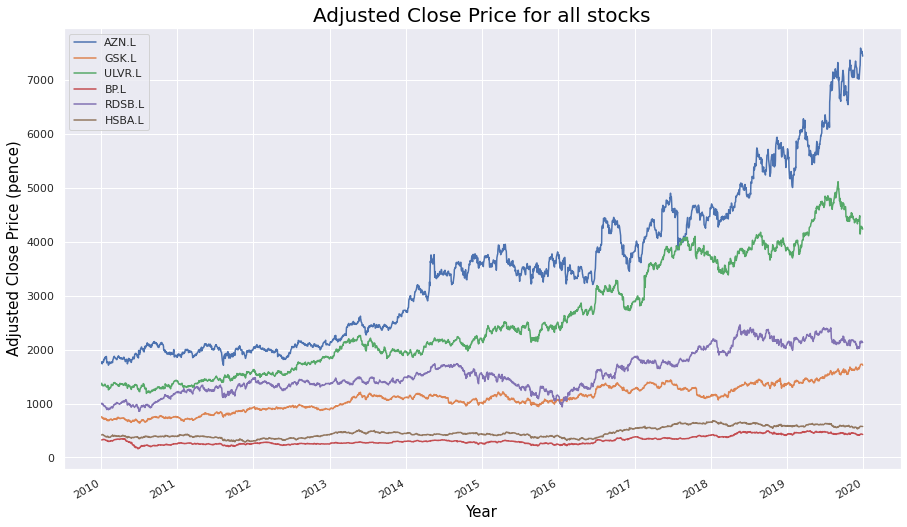

In [ ]:
# Plot Adjusted Close price for all stocks

adj_close.plot(grid = True)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Adjusted Close Price for all stocks', color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Adjusted Close Price (pence)', color = 'black', fontsize = 15);

This chart shows the absolute price rather than relative change which we are more concerned with when trading. AZN.L and ULVR.L stocks are far more expensive than BP.L and HSBA.L making the latter appear much less volatile than they truly are. 

In [ ]:
# lambda function to calculate min and max Adjusted Close price 

adj_close_min_max = adj_close.apply(lambda x: pd.Series([x.min(), x.max()], 
                              index=['min', 'max']))

adj_close_min_max

,AZN.L,GSK.L,ULVR.L,BP.L,RDSB.L,HSBA.L
min,1709.914551,635.433228,1186.555298,162.197952,855.625000,286.400848
max,7592.499512,1730.623535,5114.676758,494.692047,2460.307373,681.696045


One solution would be to use two different scales when plotting the data. One scale will be used by the BP.L and HSBA.L stocks, and the other by the more expensive stocks.

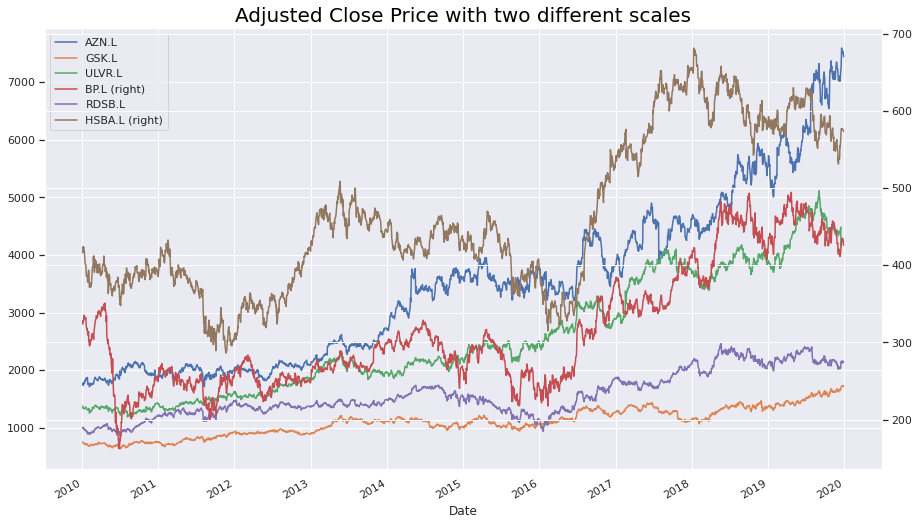

In [ ]:
# Plot BP.L and HSBA.L data on a secondary y-axis

adj_close.plot(secondary_y = ["BP.L", "HSBA.L"], grid = True)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Adjusted Close Price with two different scales', color = 'black', fontsize = 20);

## 5. Data transformation

A better solution would be to plot the stocks' returns, which requires transforming the data into something more useful for our purposes.




### 5.1 Consider stocks' returns since beginning of the time period

One transformation is to plot $return_{t,0}$  = $\frac{price_t}{price_0}$ by applying a lambda function to each column in the adj_close dataframe and return a dataframe with the result.

In [ ]:
# Transform data using lambda function to plot stocks' returns

returns_lambda = adj_close.apply(lambda x: x / x[0])
returns_lambda.head()

,AZN.L,GSK.L,ULVR.L,BP.L,RDSB.L,HSBA.L
Date,,,,,,
2010-01-04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2010-01-05,0.988609,0.975737,0.978457,1.010593,1.011275,1.014453
2010-01-06,0.977559,0.967152,0.979459,1.009453,0.998121,1.019133
2010-01-07,0.989629,0.965659,0.967435,1.015808,0.995973,1.013765
2010-01-08,0.988949,0.956327,0.969940,1.013201,0.985235,1.018582


Plot $return_{t,0}$  = $\frac{price_t}{price_0}$ with transformed data

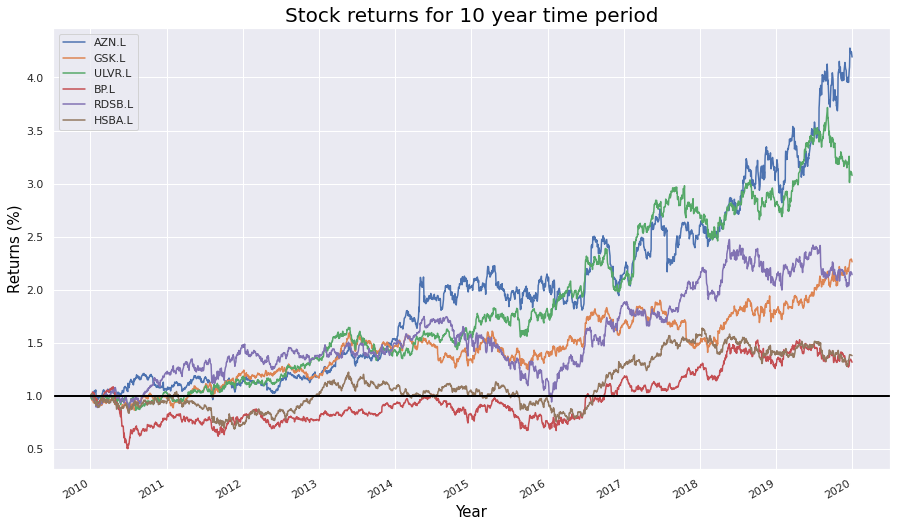

In [ ]:
# Plot to show how profitable each stock was throughout the time period

returns_lambda.plot(grid = True).axhline(y = 1, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Stock returns for 10 year time period', color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Returns (%)', color = 'black', fontsize = 15);

This plot is more useful than the previous one as we can see how profitable each stock was since the beginning of the period and which are most closely correlated. The overall trend of the stocks is much more apparent.

In [ ]:
# Create dataframe to contain returns for each company's stock to plot the change of each stock per day

returns = pd.DataFrame()

### 5.2 Percentage change

Another transformation is to calculate the daily percentage change directly using the pandas **'pct_change()'** method which computes the percentage change from the previous row by default.

This can be represented with the formula $increase_{t}$  = $\frac{price_t - price_{t-1}}{price_t}$ 





In [ ]:
# pandas pct_change() method on the Adj Close column to create a column representing return value

tickers = ['AZN.L', 'GSK.L', 'ULVR.L', 'BP.L', 'RDSB.L', 'HSBA.L']
for ticker in tickers:
    returns[ticker] = ftse100_stocks[ticker]['Adj Close'].pct_change() * 100

returns

,AZN.L,GSK.L,ULVR.L,BP.L,RDSB.L,HSBA.L
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,-1.139069,-2.426328,-2.154316,1.059279,1.127529,1.445255
2010-01-06,-1.117811,-0.879845,0.102434,-0.112816,-1.300746,0.461373
2010-01-07,1.234794,-0.154371,-1.227657,0.629610,-0.215203,-0.526756
2010-01-08,-0.068720,-0.966349,0.258933,-0.256703,-1.078169,0.475203
...,...,...,...,...,...,...
2019-12-20,2.279272,0.376433,0.714964,0.289473,-1.716165,0.033335
2019-12-23,-0.794054,0.099274,1.419720,0.824650,1.141695,-0.199935
2019-12-24,-0.413122,0.143254,-0.891844,-0.276035,0.730406,0.066782


In [ ]:
# Clean up the data by dropping the first value which becomes a 'NaN' as there is no price change from the day before.

returns.dropna(inplace=True)
returns.head()

,AZN.L,GSK.L,ULVR.L,BP.L,RDSB.L,HSBA.L
Date,,,,,,
2010-01-05,-1.139069,-2.426328,-2.154316,1.059279,1.127529,1.445255
2010-01-06,-1.117811,-0.879845,0.102434,-0.112816,-1.300746,0.461373
2010-01-07,1.234794,-0.154371,-1.227657,0.629610,-0.215203,-0.526756
2010-01-08,-0.068720,-0.966349,0.258933,-0.256703,-1.078169,0.475203
2010-01-11,1.598765,0.546415,-0.309899,2.219744,0.980896,-1.351329


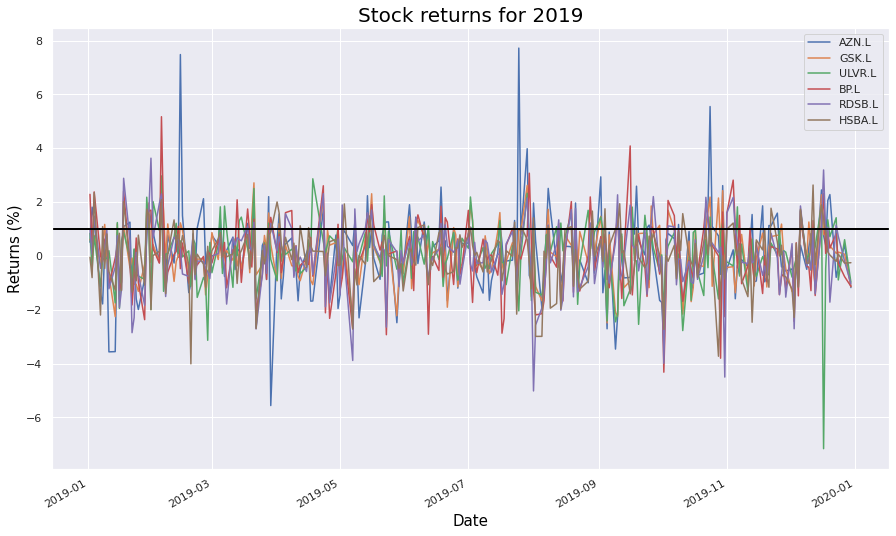

In [ ]:
# Plot returns for 2019

returns.loc['2019-01-01':'2019-12-31'].plot(grid = True).axhline(y = 1, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Stock returns for 2019', color = 'black', fontsize = 20)
plt.xlabel('Date', color = 'black', fontsize = 15)
plt.ylabel('Returns (%)', color = 'black', fontsize = 15);

The above plot for 2019 shows changes between days, which is what more advanced methods consider when modelling stock behaviour.

### 5.3 Log differences

Another way to model the growth of a stock is with log differences. Taking the natural log of the prices will give an approximation to the true daily returns.

This can be represented with the formula $change_{t}$  = $log (price_{t}) - log (price_{t-1})$ 

Using logs, or summarising changes in terms of continuous compounding, has a number of advantages over looking at simple percent changes. For example, if your portfolio goes up by 50% (say from £100 to £150) and then declines by 50% (say from £150 to £75), you’re not back where you started. If you calculate your average percentage return (in this case, 0%), that’s not a particularly useful summary of the fact that you actually ended up 25% below where you started. 

By contrast, if your portfolio goes up in logarithmic terms by 0.5, and then falls in logarithmic terms by 0.5, you are exactly back where you started. The average log return on your portfolio is exactly the same number as the change in log price between the time you bought it and the time you sold it, divided by the number of years that you held it.


In [ ]:
# Use numpy's log function to obtain and plot the log differences of the adjusted price data

stock_change = adj_close.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.

stock_change.head()

,AZN.L,GSK.L,ULVR.L,BP.L,RDSB.L,HSBA.L
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,-0.011456,-0.024562,-0.021779,0.010537,0.011212,0.014349
2010-01-06,-0.011241,-0.008837,0.001024,-0.001129,-0.013093,0.004603
2010-01-07,0.012272,-0.001545,-0.012353,0.006276,-0.002154,-0.005281
2010-01-08,-0.000687,-0.009710,0.002586,-0.002570,-0.010840,0.004741


In [ ]:
# Clean up the data by dropping NaNs

stock_change.dropna(inplace=True)
stock_change.head()

,AZN.L,GSK.L,ULVR.L,BP.L,RDSB.L,HSBA.L
Date,,,,,,
2010-01-05,-0.011456,-0.024562,-0.021779,0.010537,0.011212,0.014349
2010-01-06,-0.011241,-0.008837,0.001024,-0.001129,-0.013093,0.004603
2010-01-07,0.012272,-0.001545,-0.012353,0.006276,-0.002154,-0.005281
2010-01-08,-0.000687,-0.009710,0.002586,-0.002570,-0.010840,0.004741
2010-01-11,0.015861,0.005449,-0.003104,0.021955,0.009761,-0.013605


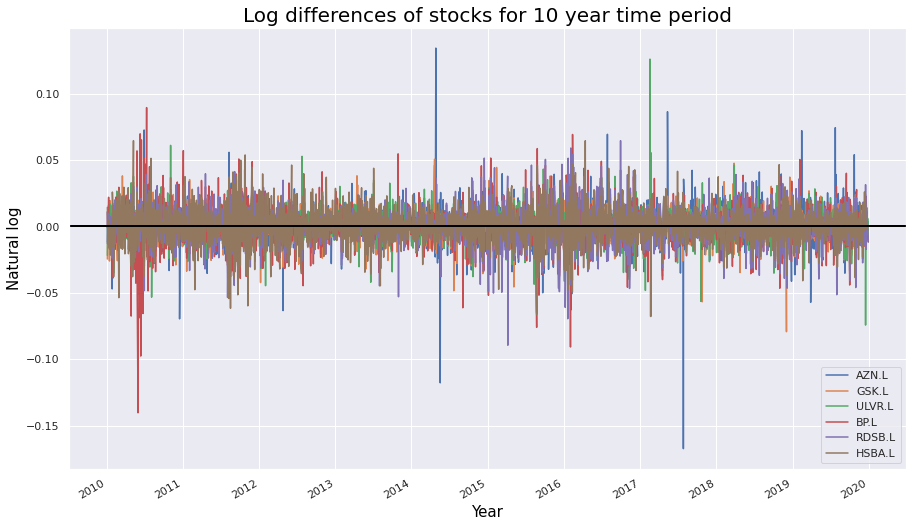

In [ ]:
# Plot log differences for 2010-2019

stock_change.plot(grid = True).axhline(y = 0, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Log differences of stocks for 10 year time period', color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Natural log', color = 'black', fontsize = 15);

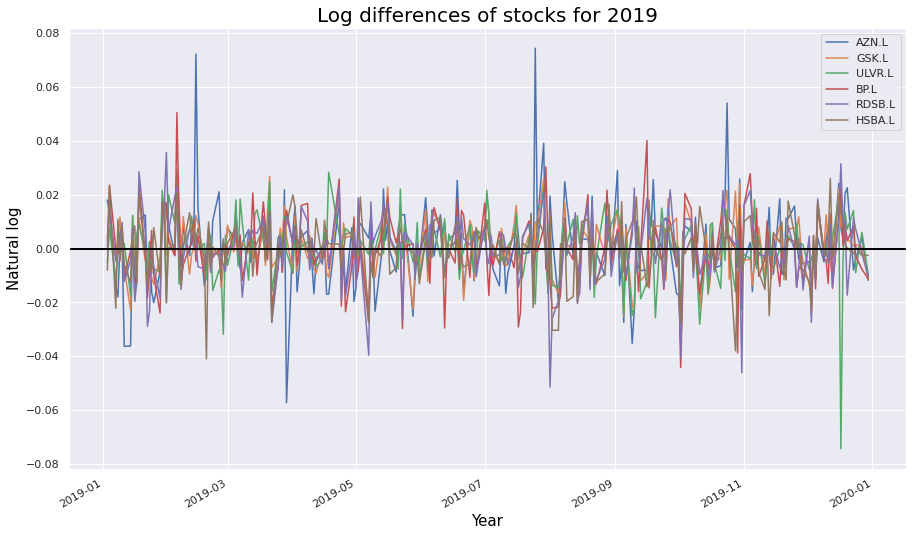

In [ ]:
# Plot log differences for 2019

stock_change.loc['2019-01-01':'2019-12-31'][1:].plot(grid = True).axhline(y = 0, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Log differences of stocks for 2019', color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Natural log', color = 'black', fontsize = 15);

### 5.4 Annualise returns

We can annualise our returns, thus computing the annual percentage rate (APR). This helps us keep returns on a common time scale.

In [ ]:
# annualise returns

stock_change_apr = stock_change * 252 * 100    # There are 252 trading days in a year; the 100 converts to percentages

stock_change_apr

,AZN.L,GSK.L,ULVR.L,BP.L,RDSB.L,HSBA.L
Date,,,,,,
2010-01-05,-288.692640,-618.974637,-548.820746,265.534311,282.547361,361.597568
2010-01-06,-283.274636,-222.702116,25.800077,-28.445573,-329.938575,115.998717
2010-01-07,309.262539,-38.931591,-311.284146,158.164337,-54.289594,-133.093472
2010-01-08,-17.323459,-244.704232,65.166796,-64.772398,-273.173965,119.467630
2010-01-11,399.702035,137.321673,-78.215779,553.257555,245.981360,-342.856816
...,...,...,...,...,...,...
2019-12-20,567.928590,94.682900,179.529970,72.841702,-436.227657,8.399098
2019-12-23,-200.900390,25.004630,355.253534,206.959602,286.077260,-50.433964
2019-12-24,-104.322271,36.074053,-225.752938,-69.656956,183.393469,16.823428


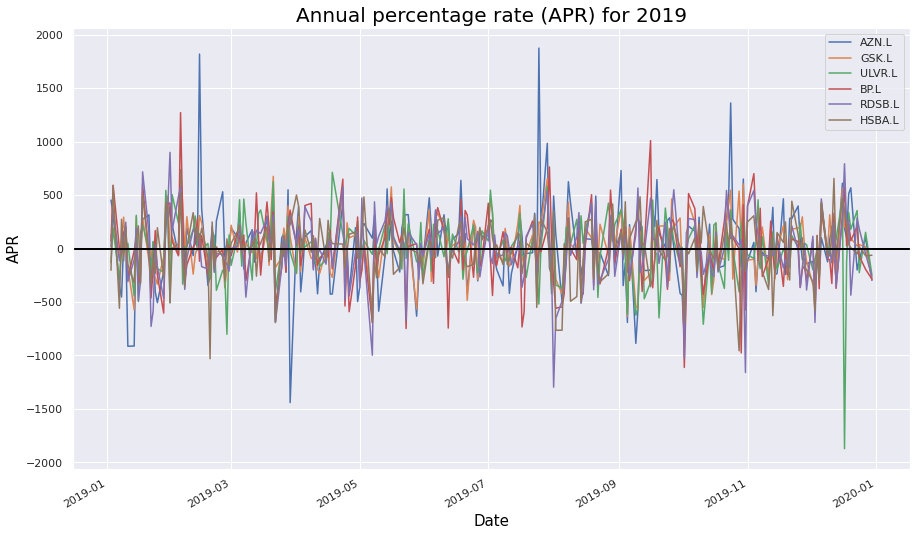

In [ ]:
# Plot annualised returns for 2019

stock_change_apr['2019-01-01':'2019-12-31'].plot(grid = True).axhline(y = 0, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Annual percentage rate (APR) for 2019', color = 'black', fontsize = 20)
plt.xlabel('Date', color = 'black', fontsize = 15)
plt.ylabel('APR', color = 'black', fontsize = 15);

## 6. Calculating statistical data for returns

### 6.1 Calculate minimum and maximum returns for 2010-2019

In [ ]:
# Date of worst single day returns

returns.idxmin()

AZN.L    2017-07-27
GSK.L    2018-12-03
ULVR.L   2019-12-17
BP.L     2010-06-01
RDSB.L   2015-04-08
HSBA.L   2017-02-21
dtype: datetime64[ns]

In [ ]:
# Date of best single day returns

returns.idxmax()

AZN.L    2014-04-28
GSK.L    2014-04-22
ULVR.L   2017-02-17
BP.L     2010-07-12
RDSB.L   2016-09-29
HSBA.L   2010-05-10
dtype: datetime64[ns]

There may be some significance in the two pharmaceutical stocks' best day being within a few days of each other in the same month and year. Also, BP's largest drop and biggest gain were in consecutive months in the same year.

### 6.2 Mean

The mean is a statistical indicator that can be used to gauge the performance of a company’s stock price over a particular time period. Here it is the average of the returns, and also determines the standard deviation and variance.


In [ ]:
# Compute mean to give a representation of the average expected returns 

returns.mean()

AZN.L     0.066233
GSK.L     0.038683
ULVR.L    0.051350
BP.L      0.022450
RDSB.L    0.039664
HSBA.L    0.021183
dtype: float64

### 6.3 Variance

The variance measures variability from the average or mean. It correlates to the size of the overall range of the data set, being greater when there is a wider range and narrower when there is a narrower range.  

It is calculated by taking the differences between each value in the data set and the mean, squaring the differences to make them positive, and dividing the sum of the squares by the number of values in the data set.

The calculation of variance uses squares because it weighs outliers more heavily than data closer to the mean. This calculation also prevents differences above the mean from cancelling out those below, which would result in a variance of zero.

This can be represented by the formula σ<sup>2</sup> = $\frac {\sum_{i = 1}^n (x_i - \overline{x})^2}{n}$




In [ ]:
# Compute variance to give a measure of the dispersion of returns around the mean

returns.var()

AZN.L     1.851244
GSK.L     1.249351
ULVR.L    1.343593
BP.L      2.303139
RDSB.L    1.878665
HSBA.L    1.686970
dtype: float64

### 6.4 Standard deviation

Standard deviation (σ) is often used by investors to measure the risk of a stock or a stock portfolio, the basic idea being that it is a measure of volatility. It looks at how far from the mean a group of values is, and is calculated as the square root of variance by figuring out the variation between each data point relative to the mean. Essentially, it is the square root of the average squared deviation from the mean, and the more spread out the values are, the higher the standard deviation.
 


In [ ]:
# Compute the standard deviation to describe dispersion, or variability, in the stock returns from the mean 
 
returns.std()

AZN.L     1.360604
GSK.L     1.117744
ULVR.L    1.159135
BP.L      1.517610
RDSB.L    1.370644
HSBA.L    1.298834
dtype: float64

However, in order for standard deviation to be an accurate measure of risk, an assumption has to be made that investment performance data follows a normal distribution and has a skewness of 0.

### 6.5 Skewness

Financial returns are typically positively or negatively skewed and warp the look of the normally distributed bell-shaped curve distorting the accuracy of standard deviation as a measure of risk. Skewness essentially measures the relative size of the two tails of the distribution.

In [ ]:
# Compute skewness to measure the asymmetry of the data around its mean

returns.skew()

AZN.L    -0.103051
GSK.L    -0.139005
ULVR.L    0.464126
BP.L     -0.220532
RDSB.L   -0.139581
HSBA.L    0.008991
dtype: float64

Here the data looks fairly symmetrical as the skewness for all of the stock returns lies between -0.5 and 0.5 with ULVR.L being the most skewed. With a measure of 0.46 it is slightly positively skewed.

### 6.6 Kurtosis

Kurtosis is a measure of the combined sizes of the two tails - not the peakedness or flatness. It measures the tail-heaviness of the distribution, or amount of probability in the tails. 


In [ ]:
# Compute kurtosis as a measure of the combined sizes of the two tails.

returns.kurt()

AZN.L     15.899399
GSK.L      2.272297
ULVR.L     9.480875
BP.L       5.541768
RDSB.L     2.663504
HSBA.L     2.679514
dtype: float64

A normal distribution has a kurtosis of 3, however the pandas kurtosis function makes it a uniform zero and in this case the measure is called excess kurtosis.

It appears that AZN.L has significant excess kurtosis followed by ULVR.L.


## 7. Data visualisation of returns

### 7.1 Pairplot 

Plot pairwise relationships of the stocks with the pairplot() function which uses scatterplot() for each pairing of the variables and histplot() for the marginal plots along the diagonal.

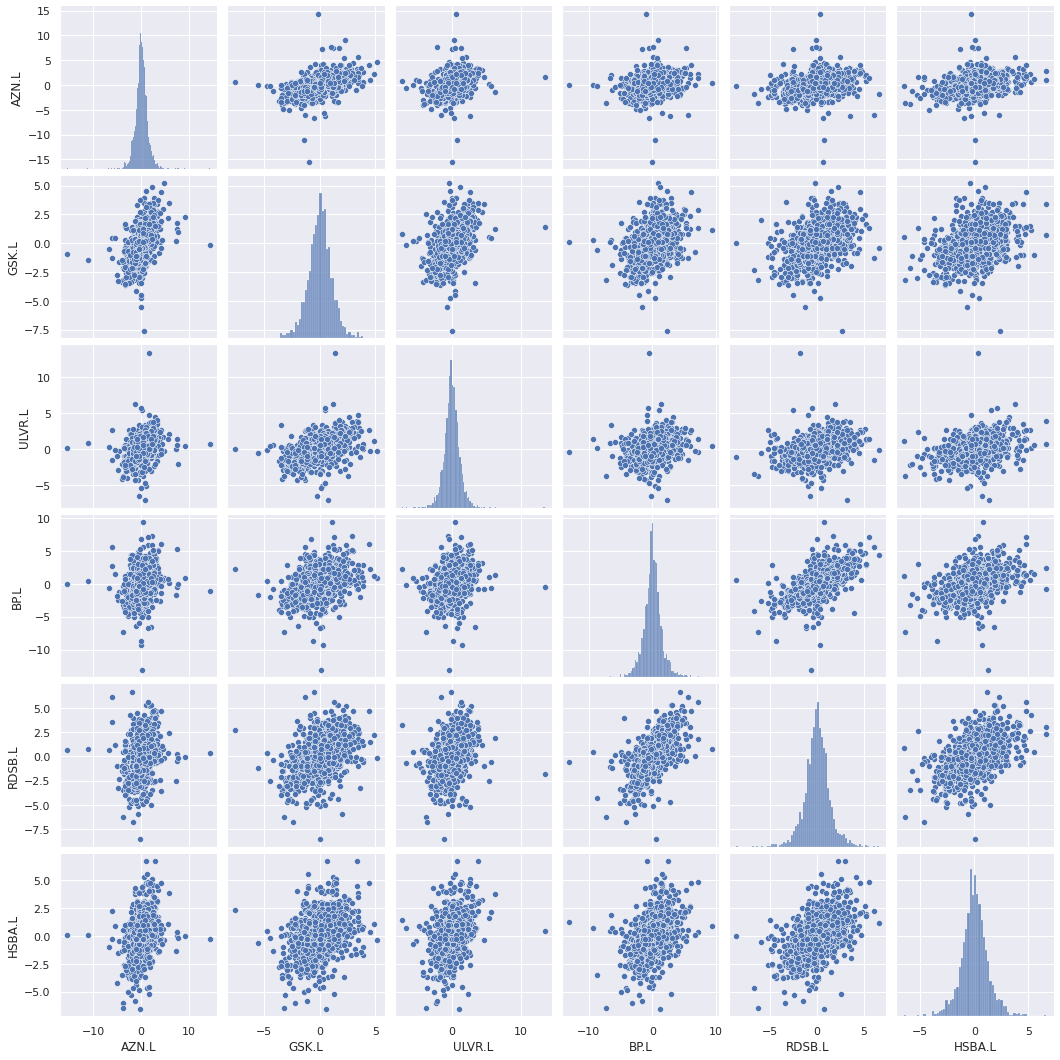

In [ ]:
# Pairplot of returns dataframe 

sns.pairplot(returns);

### 7.2 Box plots

Box and whisker plots are a standardised way of displaying the distribution of data based on a five number summary (minimum, first quartile (Q1), median, third quartile (Q3), and maximum), with a line going through the box at the median. 



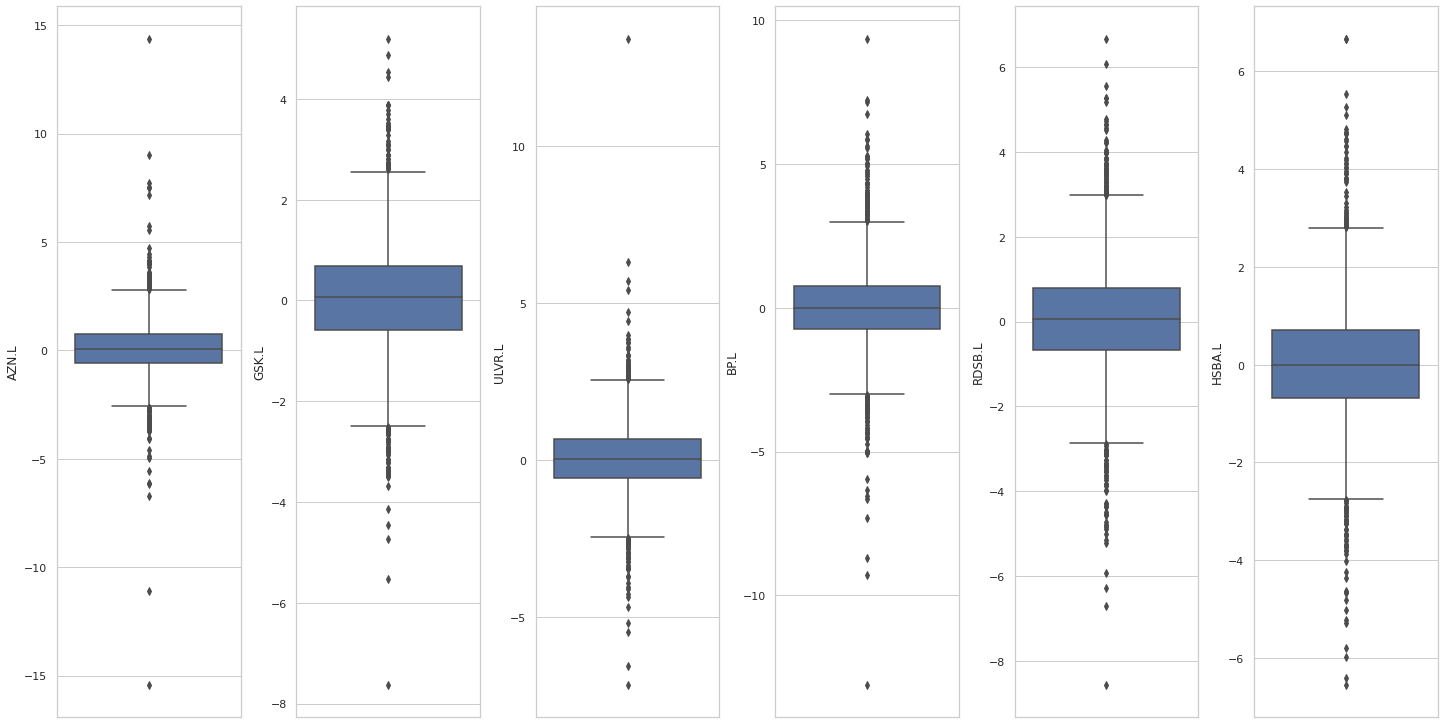

In [ ]:
# Boxplots showing distribution of the returns data over the time period 

sns.set_style("whitegrid")
fig, axs = plt.subplots(ncols=6, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in returns.items():
    sns.boxplot(y=k, data=returns, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

By comparing the interquartile ranges (box lengths), we can compare dispersion. If two boxes do not overlap with one another then there is a difference between the two groups. We can see that AZN.L and ULVR. do not overlap with the other stocks.

If we compare the respective medians and the median line of one box lies outside of another entirely, then there is likely to be a difference between the two groups. Again we can see that AZN.L and ULVR. are different.

Whiskers show how big a range there is between maximum and minimum values, with larger ranges indicating wider distribution, that is, more scattered data.

We can look for signs of skewness suggesting that data may not be normally distributed. Skewed data show a lopsided box plot, where the median cuts the box into two unequal pieces. If the longer part of the box is above the median, the data is said to be positively skewed. If the longer part is or below the median, the data is negatively skewed.

Any values in the data set that are more extreme than the adjacent values are plotted as separate points on the box plot. This identifies them as potential outliers.


### 7.3 Distribution plots

Distribution plots depict the variation in the data distribution. Here the distribution of returns is shown by a histogram and a line in combination with it which is the kernel density estimate.

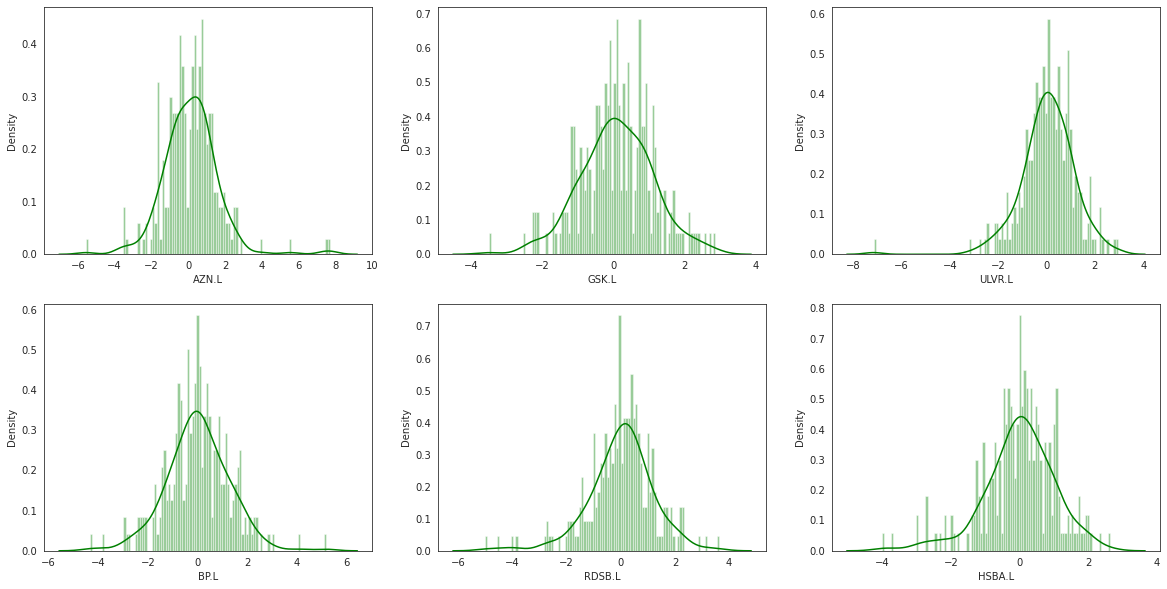

In [ ]:
# Distribution plots showing the data for returns for 2019 

sns.set_style("white")

tickers = ['AZN.L', 'GSK.L', 'ULVR.L', 'BP.L', 'RDSB.L', 'HSBA.L']
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()

for ticker in tickers:
    sns.distplot(returns.loc['2019-01-01':'2019-12-31'][ticker], color='green', bins=100, ax=axs[index])
    index += 1

### 7.4 Covariance

Covariance indicates the **direction** of the linear relationship between variables. It is a measure of the relationship between two stocks' returns and can help determine if stocks' returns tend to move with or against each other. 

Investors might even be able to select stocks that complement each other in terms of price movement. This can help reduce the overall risk and increase the overall potential return of a portfolio.

In [ ]:
# Covariance matrix to show direction of relationship between stocks' returns

returns.cov() 

,AZN.L,GSK.L,ULVR.L,BP.L,RDSB.L,HSBA.L
AZN.L,1.851244,0.827393,0.610810,0.582091,0.586106,0.621696
GSK.L,0.827393,1.249351,0.615948,0.610685,0.641658,0.558689
ULVR.L,0.610810,0.615948,1.343593,0.507125,0.598461,0.582591
BP.L,0.582091,0.610685,0.507125,2.303139,1.436924,0.884518
RDSB.L,0.586106,0.641658,0.598461,1.436924,1.878665,0.904445
HSBA.L,0.621696,0.558689,0.582591,0.884518,0.904445,1.686970


### 7.5 Correlation

Correlation measures both the **strength and direction** of the linear relationship between two variables, or the degree to which two variables move in relation to each other, and is a function of the covariance.

In [ ]:
# Correlation matrix to show strength and direction of relationship between stocks' returns

returns.corr()

,AZN.L,GSK.L,ULVR.L,BP.L,RDSB.L,HSBA.L
AZN.L,1.000000,0.544049,0.387294,0.281903,0.314282,0.351797
GSK.L,0.544049,1.000000,0.475410,0.360010,0.418829,0.384834
ULVR.L,0.387294,0.475410,1.000000,0.288285,0.376684,0.386969
BP.L,0.281903,0.360010,0.288285,1.000000,0.690795,0.448738
RDSB.L,0.314282,0.418829,0.376684,0.690795,1.000000,0.508047
HSBA.L,0.351797,0.384834,0.386969,0.448738,0.508047,1.000000


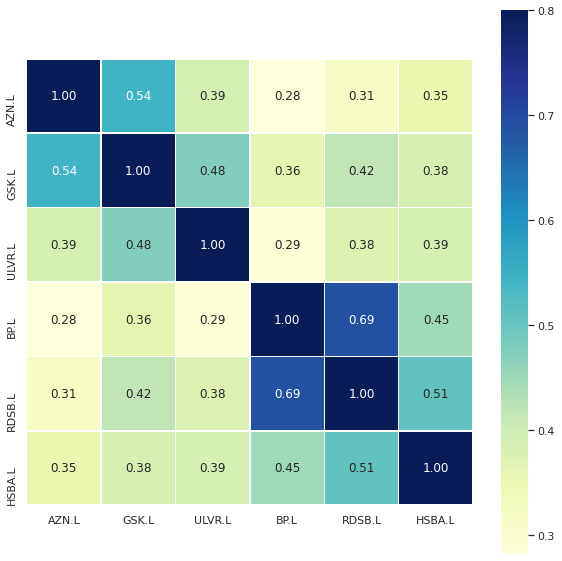

In [ ]:
# The heatmap clearly shows the strength of correlation between pairs of company returns

plt.figure(figsize=(10, 10))
sns.heatmap(data = returns.corr(), vmax=.8, linewidths=0.5,  fmt='.2f',
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.show()

The strongest correlation is between RDSB and BP (oil stocks) followed by GSK and AZN (pharmaceutical stocks).

## 8. FTSE 100 Index data

Finally, we will visualise data from the launch of the FTSE 100 Index in January 1984 to the end of 2020 as being representative of the UK stock market.  


In [ ]:
# Download FTSE 100 historical stock data from Yahoo! Finance for 1984-2020

ftse100_idx_to_2020 = yf.download("^FTSE", start=datetime.datetime(1984, 1, 1), 
                                     end=datetime.datetime(2021, 1, 1))
ftse100_idx_to_2020

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1984-01-03,997.500000,1001.400024,997.500000,997.500000,997.500000,0
1984-01-04,997.500000,999.500000,993.299988,998.599976,998.599976,0
1984-01-05,1007.099976,1015.799988,1007.099976,1015.799988,1015.799988,0
1984-01-06,1019.000000,1029.300049,1019.000000,1029.000000,1029.000000,0
1984-01-09,1030.599976,1035.400024,1030.599976,1034.599976,1034.599976,0
...,...,...,...,...,...,...
2020-12-23,6453.200195,6497.299805,6431.200195,6495.799805,6495.799805,807695400
2020-12-24,6495.799805,6530.299805,6479.600098,6502.100098,6502.100098,477470700
2020-12-29,6502.100098,6676.600098,6502.100098,6602.700195,6602.700195,824116800


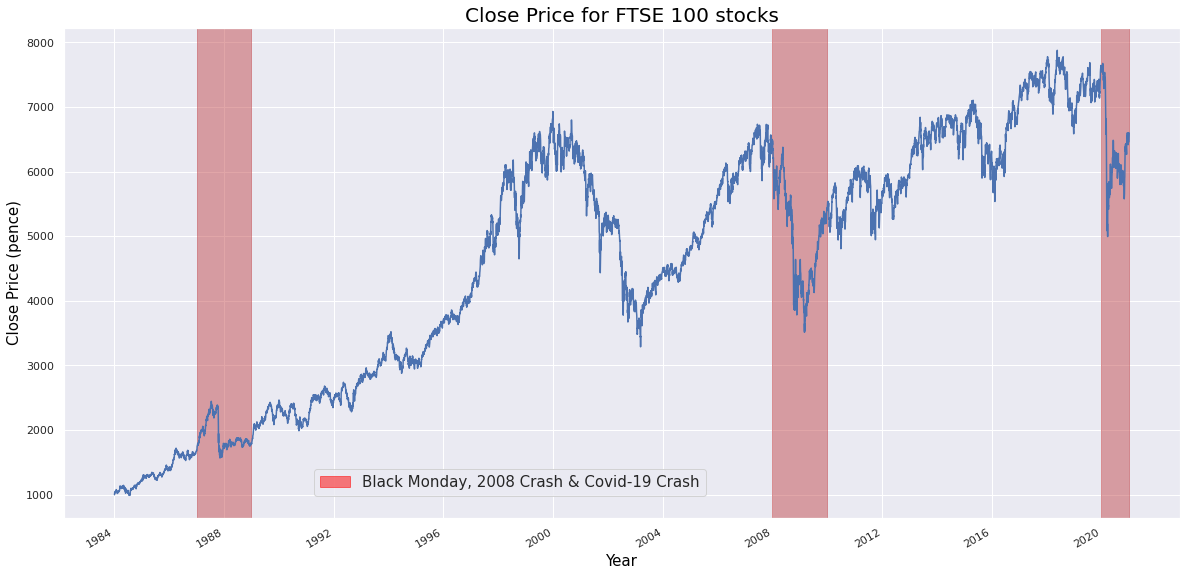

In [ ]:
def ftse100_to_2020_plot():
    ftse100_idx_to_2020['Close'].plot(grid = True)
    sns.set(rc={'figure.figsize':(20, 10)})
    plt.axvspan('1987','1989',color='r',alpha=.5)
    plt.axvspan('2008','2010',color='r',alpha=.5)
    plt.axvspan('2020','2021',color='r',alpha=.5)
    labs = mpatches.Patch(color='red',alpha=.5, label="Black Monday, 2008 Crash & Covid-19 Crash")
    plt.legend(handles=[labs], prop={"size":15},  bbox_to_anchor=(0.4, 0.1), loc='upper center', borderaxespad=0.)
    plt.title('Close Price for FTSE 100 stocks', color = 'black', fontsize = 20)
    plt.xlabel('Year', color = 'black', fontsize = 15)
    plt.ylabel('Close Price (pence)', color = 'black', fontsize = 15)
    plt.show();

ftse100_to_2020_plot()

The plot clearly shows the major market events of Black Monday in 1987, the 2008 Global Financial Crisis, and the Coronavirus Crash in 2020 and appears to confirm the overall upward trend of stocks from 2010-2019 evident in the selection of stocks analysed.